In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from traitlets import validate
import sklearn.model_selection
import numpy as np
import tensorflow as tf
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#raed_path
all_folder="E:\DL\data\archive (2)"
train_folder=all_folder+"/train"
test_folder=all_folder+"/test"
validate_folder=all_folder+"/val"
#store_it_there_inside_path
normal_folder_test=test_folder+"/NORMAL/"
pneumonia_folder_test=test_folder+"/PNEUMONIA/"
normal_folder_train=train_folder+"/NORMAL/"
pneumonia_folder_train=train_folder+"/PNEUMONIA/"
normal_folder_validate=validate_folder+"/NORMAL/"
pneumonia_folder_validate=validate_folder+"/PNEUMONIA/"
#get_names of file in folder(names of pic)_by path-of folder
import os
name_files_normal_train=os.listdir(normal_folder_train)
name_files_pneumonia_train=os.listdir(pneumonia_folder_train)
name_files_normal_test=os.listdir(normal_folder_test)
name_files_pneumonia_test=os.listdir(pneumonia_folder_test)
name_files_normal_validate=os.listdir(normal_folder_validate)
name_files_pneumonia_validate=os.listdir(pneumonia_folder_validate)

In [3]:
#store_path_in_Data_frame
import pandas as pd
df_train_normal=pd.DataFrame(name_files_normal_train,columns=["images"])
df_train_normal["labels"]=0
df_train_normal["images"]=normal_folder_train+df_train_normal["images"]


df_train_pneumonia=pd.DataFrame(name_files_pneumonia_train,columns=["images"])
df_train_pneumonia["labels"]=2
df_train_pneumonia["images"]=pneumonia_folder_train+df_train_pneumonia["images"]

df_test_normal=pd.DataFrame(name_files_normal_test,columns=["images"])
df_test_normal["labels"]=0
df_test_normal["images"]=normal_folder_test+df_test_normal["images"]

df_test_pneumonia=pd.DataFrame(name_files_pneumonia_test,columns=["images"])
df_test_pneumonia["labels"]=2
df_test_pneumonia["images"]=pneumonia_folder_test+df_test_pneumonia["images"]

df_validate_normal=pd.DataFrame(name_files_normal_validate,columns=["images"])
df_validate_normal["labels"]=0
df_validate_normal["images"]=normal_folder_validate+df_validate_normal["images"]

df_validate_pneumonia=pd.DataFrame(name_files_pneumonia_validate,columns=["images"])
df_validate_pneumonia["labels"]=1
df_validate_pneumonia["images"]=pneumonia_folder_validate+df_validate_pneumonia["images"]

In [5]:
#concat
DF1=pd.concat([df_train_pneumonia,df_train_normal,df_test_pneumonia,df_test_normal,df_validate_pneumonia,df_validate_normal], ignore_index=True)
#df_test=pd.concat([df_test_pneumonia,df_test_normal],ignore_index=True)
#df_validate=pd.concat([df_validate_pneumonia,df_validate_normal],ignore_index=True)
#shuffle
DF1.sample(frac=1, random_state=42).reset_index(drop=True)
# df_test.sample(frac=1, random_state=42).reset_index(drop=True)
# df_validate.sample(frac=1, random_state=42).reset_index(drop=True)

#convert to matrix
DF1["mat_images"]=DF1['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))
# df_train["mat_images"]=df_train['images'].apply(lambda x: plt.imread(x))
# df_validate["mat_images"]=df_validate['images'].apply(lambda x: plt.imread(x))

In [9]:
X=DF1["mat_images"]
Y=DF1["labels"]

In [10]:
#normalize 
X=X/255

In [12]:
from tensorflow.keras.utils import to_categorical
Y=to_categorical(Y,4)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4684,)
(4684, 4)
(1172,)
(1172, 4)


In [13]:
X_test = np.array([np.array(x, dtype=np.float32) for x in X_test], dtype=object)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [14]:
X_train = np.array([np.array(x, dtype=np.float32) for x in X_train], dtype=object)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4684, 224, 224)
(4684, 4)
(1172, 224, 224)
(1172, 4)


In [17]:
import tensorflow as tf
import keras
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       1

In [18]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64) 

Epoch 1/10
74/74 [==============================] - 435s 6s/step - loss: 0.4053 - accuracy: 0.8301 - val_loss: 0.1853 - val_accuracy: 0.9309
Epoch 2/10
74/74 [==============================] - 432s 6s/step - loss: 0.1681 - accuracy: 0.9400 - val_loss: 0.1674 - val_accuracy: 0.9360
Epoch 3/10
74/74 [==============================] - 430s 6s/step - loss: 0.1548 - accuracy: 0.9458 - val_loss: 0.2001 - val_accuracy: 0.9283
Epoch 4/10
74/74 [==============================] - 432s 6s/step - loss: 0.1352 - accuracy: 0.9543 - val_loss: 0.1462 - val_accuracy: 0.9445
Epoch 5/10
74/74 [==============================] - 429s 6s/step - loss: 0.1253 - accuracy: 0.9567 - val_loss: 0.1444 - val_accuracy: 0.9488
Epoch 6/10
74/74 [==============================] - 436s 6s/step - loss: 0.1037 - accuracy: 0.9629 - val_loss: 0.2240 - val_accuracy: 0.9189
Epoch 7/10
74/74 [==============================] - 430s 6s/step - loss: 0.0987 - accuracy: 0.9629 - val_loss: 0.1598 - val_accuracy: 0.9420
Epoch 8/10
74

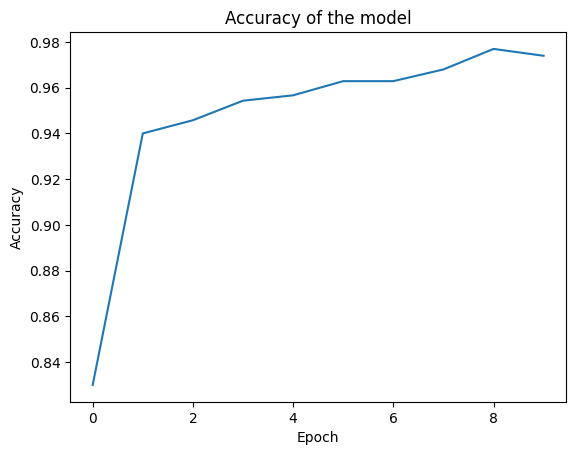

In [20]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()